# Mask Detection Using CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import zipfile,os

import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.models import Sequential

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'USERNAME'
os.environ['KAGGLE_KEY'] = 'KEY'

### Sumber dataset [kaggle.com](https://www.kaggle.com/search?q=ashishjangra27%2Fface-mask-12k-images-dataset) 

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 98% 325M/330M [00:02<00:00, 145MB/s]
100% 330M/330M [00:02<00:00, 125MB/s]


In [ ]:
!unzip -q face-mask-12k-images-dataset

In [ ]:
train_dir = '/content/Face Mask Dataset/Train'

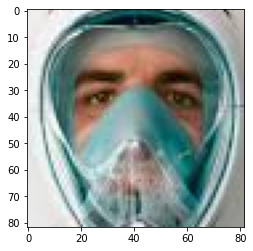

In [ ]:
img = image.load_img('/content/Face Mask Dataset/Train/WithMask/10.png')
imgplot = plt.imshow(img)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_dir, # direktori data latih
        shuffle=True,
        target_size=(150,150),
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir, # direktori data validasi
        shuffle=True,
        target_size=(150,150),
        class_mode='categorical',
        subset='validation')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# create model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [ ]:
# callback
class mCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print('\nPelatihan dihentikan, Akurasi lebih dari 97% !')
      self.model.stop_training = True

callbacks = mCallback()

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=32,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=32,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
32/32 - 65s - loss: 0.7544 - accuracy: 0.6572 - val_loss: 0.5069 - val_accuracy: 0.7969 - 65s/epoch - 2s/step
Epoch 2/100
32/32 - 65s - loss: 0.3337 - accuracy: 0.8555 - val_loss: 0.3287 - val_accuracy: 0.8682 - 65s/epoch - 2s/step
Epoch 3/100
32/32 - 65s - loss: 0.2961 - accuracy: 0.8857 - val_loss: 0.2639 - val_accuracy: 0.9150 - 65s/epoch - 2s/step
Epoch 4/100
32/32 - 65s - loss: 0.2388 - accuracy: 0.9023 - val_loss: 0.2019 - val_accuracy: 0.9395 - 65s/epoch - 2s/step
Epoch 5/100
32/32 - 65s - loss: 0.1929 - accuracy: 0.9326 - val_loss: 0.2153 - val_accuracy: 0.9238 - 65s/epoch - 2s/step
Epoch 6/100
32/32 - 65s - loss: 0.2040 - accuracy: 0.9316 - val_loss: 0.2293 - val_accuracy: 0.9258 - 65s/epoch - 2s/step
Epoch 7/100
32/32 - 65s - loss: 0.1815 - accuracy: 0.9326 - val_loss: 0.2105 - val_accuracy: 0.9297 - 65s/epoch - 2s/step
Epoch 8/100
32/32 - 65s - loss: 0.1757 - accuracy: 0.9395 - val_loss: 0.2795 - val_accuracy: 0.9004 - 65s/epoch - 2s/step
Epoch 9/100
32/32 - 65s 

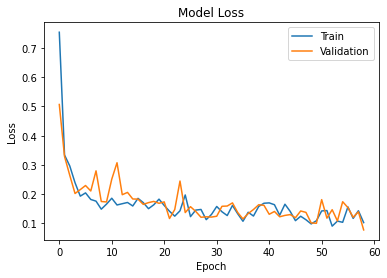

In [ ]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

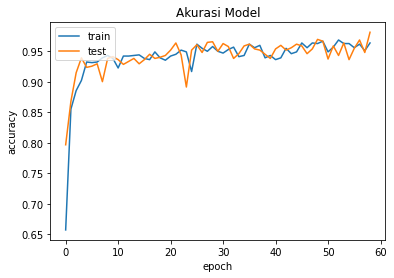

In [ ]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving IMG20191207222254.jpg to IMG20191207222254.jpg
IMG20191207222254.jpg
Without Mask


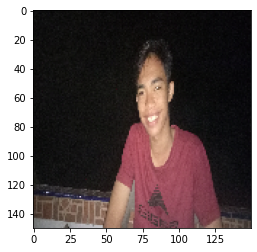

In [ ]:
# PREDICTIONS
uploaded = files.upload()
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Without Mask')
  elif classes[0][1]==1:
    print('With Mask')
  else:
    print('Unrecognized')

In [ ]:
model.save("mask_detector.model", save_format="h5")